# Laboratory Session 2 -- Assignment

To be delivered until 2022-12-16 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

**2.a)** Load the dataset "wine.csv". Do not change the dataset file.

In [97]:
import csv
import os
import numpy as np
from copy import deepcopy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

wines_csv = open('winequality.csv', mode='r')

#Read and convert to list of lists
wines = csv.reader(wines_csv)
wines_list0 = list(wines)

**2.b)** Encode the feature "type".

In [103]:
wines_list = deepcopy(wines_list0)

#Encode
i = 0
for item in wines_list:
  wines_list[i] = item[0].split(';')
  j = 0
  for subitem in wines_list[i]:
    try:
      wines_list[i][j] = float(subitem)
    except:
      if subitem == 'red':
        wines_list[i][j] = 0
      elif subitem == 'white':
        wines_list[i][j] = 1
      pass
    j+=1
  i += 1


**2.c)** Perform a simple linear regression considering *quality* as the response and *pH* as the predictor. Given the results, comment on the following statements:

In [104]:
#Extract features
wines_list_copy = deepcopy(wines_list)
features = wines_list_copy.pop(0)

#Make dict with features and respective index (may be useful later)
features_dict = {}
for i, feat in enumerate(features): features_dict[feat] = i 

#Convert to np.array
wines_list_np = np.array(wines_list_copy)

#Get X and Y
X = wines_list_np[:,features_dict['pH']].reshape((-1, 1))
Y = wines_list_np[:,features_dict['quality']]

#Initialize Model
model = LinearRegression()

#Fit Model
model.fit(X, Y)

#Get R^2
r_sq = model.score(X, Y)

print(f"R^2: {r_sq}")

R^2: 0.00038047247739547707


    i) Are the predictor and response statistically related?

No

    ii) How strong is the relationship between predictor and response? (*Hint: comment on the R^2 score of the model*)

Since R^2 is very small (R^2 << 0.1), the relationship is very weak.

    iii) Is the relationship between the predictor and response positive or negative?

In [106]:
print('Slope: ', model.coef_.item())

Slope:  0.10593790034693865


The slope is positive, so the relationship is positive

    iv) What is the predicted value of quality when the pH is 9?

In [107]:
#Get Linear Regression parameters
a1 = model.coef_
a2 = model.intercept_

#Solve equation
def inv_lin(a,b,val):
  return (val-b)/a

print('Predicted Quality: ', inv_lin(a1,a2,9).item())

Predicted Quality:  33.25140009025156


**2.d)** Plot a scatter plot of the response and predictor, along with the regression line.

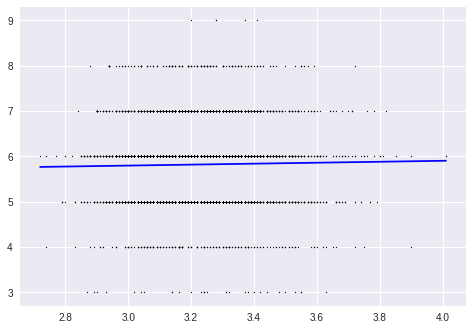

In [113]:
#initialize and scatter
plt.style.use('seaborn')
plt.clf()
plt.scatter(X, Y, color="black",s=1)

#Get points to draw line
xfit = np.array([np.amin(X), np.amax(X)])
yfit = model.predict(xfit.reshape((-1,1)))

#Plot
plt.plot(xfit, yfit, color = 'blue')
plt.show()

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

ANSWER: When a 1-nearest neighbors is used (K = 1), the training sample selected is the closest to the test sample. Given that the test sample is in the training dataset, it'll always select itself as the closest and never make a mistake. So, regardless of the dataset, the training error will be zero.
Since the average error rate for this method is equal to 18% and the training error rate is 0%, the test error rate is equal to 36%.
Even though the training error rate for the 1-nearest neighbors method is smaller than the error rate for logistic regression, the test error rate is greater, making the logistic regression method a better choice.

**4.a)** Create a new column, "quality7", that contains a 1 if quality contains a value equal or above 7, and a 0 if quality contains a value below 7. Drop the original column "quality".

In [114]:
import seaborn as sn
import pandas as pd

#Convert to pandas data frame
wines7 =  pd.DataFrame(wines_list_np)

#Encode quality
h = 0
for h in range(len(wines7[12])):
  if wines7[12][h] >= 7:
    wines7[12][h] = 1
  else:
    wines7[12][h] = 0
  h+=1


**4.b)** Do a correlation matrix plot between all the columns to evaluate which features are linearly correlated. Consider a statistical significance of 0.1%. Describe your findings, with a focus on evaluating which features are most related with "quality7".

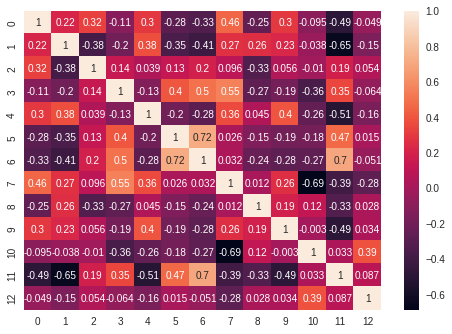

Indexes of features with highest correlation to quality:  [ 7 10 12]
{'fixed acidity': 0, 'volatile acidity': 1, 'citric acid': 2, 'residual sugar': 3, 'chlorides': 4, 'free sulfur dioxide': 5, 'total sulfur dioxide': 6, 'density': 7, 'pH': 8, 'sulphates': 9, 'alcohol': 10, 'type': 11, 'quality': 12}


In [135]:
#Show correlation matrix
corr_matrix = wines7.corr()
sn.heatmap(corr_matrix, annot=True)
ticks = np.arange(0,12,1)
plt.show()

#Get features with highest correlation
id_quality = features_dict['quality']
quality_col = abs(corr_matrix[12].to_numpy())
idxs = np.argpartition(quality_col, -3)[-3:]
print('Indexes of features with highest correlation to quality: ', idxs)
print(features_dict)


0 indicates no linear correlation between two variables. 1 indicates a perfectly positive linear correlation between two variables.
A statistically significant test result (P ≤ 0.001) means that the test hypothesis is false or should be rejected. The features with highest correlation are the DENSITY and ALCOHOL.

**4.c)** Create the inputs as all the predictors and outputs as the "quality7" feature. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [136]:
#Divide dataset
training_data = wines7.sample(frac=0.7, random_state=25)
testing_data = wines7.drop(training_data.index)

#Converto to np.array
training_data_np = training_data.to_numpy()
testing_data_np = testing_data.to_numpy()

#Divide into input and output
X_training = training_data_np[:,:12]
X_testing = testing_data_np[:,:12]
Y_training = training_data_np[:,12]
Y_testing = testing_data_np[:,12]

**4.d)** Perform LDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Initialize model
lda = LDA()

#Fit Model
lda.fit(X_training, Y_training)

#Get predictions
Y_predicted = lda.predict(X_testing)

#Results and print
evaluate = Y_testing==Y_predicted
print('Error: ', (evaluate.shape[0]-np.count_nonzero(evaluate))/evaluate.shape[0])

Error:  0.18163160595177014


**4.e)** Perform QDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [138]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

#Initialize model
qda = QDA()

#Fit Model
qda.fit(X_training, Y_training)

#Get predictions
Y_predicted = qda.predict(X_testing)

#Results and print
evaluate = Y_testing == Y_predicted
print('Error: ', (evaluate.shape[0]-np.count_nonzero(evaluate))/evaluate.shape[0])

Error:  0.22986146741918934


**4.f)** Perform logistic regression on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [139]:
import numpy
from sklearn import linear_model

#Initialize model
logr = linear_model.LogisticRegression(solver='newton-cg', max_iter=100)

#Fit Model
logr.fit(X_training, Y_training)

#Get predictions
Y_predicted = logr.predict(X_testing)

#Results and print
evaluate = Y_testing == Y_predicted
print('Error: ', (evaluate.shape[0]-np.count_nonzero(evaluate))/evaluate.shape[0])

Error:  0.18163160595177014


**4.g)** Perform naive Bayes on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [140]:
from sklearn.naive_bayes import GaussianNB

#Initialize model
gnb = GaussianNB()

#Fit Model
gnb.fit(X_training, Y_training)

#Get predictions
Y_predicted = gnb.predict(X_testing)

#Results and print
evaluate = Y_testing==Y_predicted
print('Error: ', (evaluate.shape[0]-np.count_nonzero(evaluate))/evaluate.shape[0])

Error:  0.27142124166239096


**4.h)** Perform KNN on the training data, with several values of K, in order to predict "quality7" using the remaining variables. What test errors are obtained? Which value of K seems to perform the best on this data set?

Error: with  1 neighbors 0.18419702411493075
Error: with  3 neighbors 0.19753719856336582
Error: with  5 neighbors 0.19343252950230888
Error: with  7 neighbors 0.19548486403283735
Error: with  11 neighbors 0.20112878399179066
Error: with  17 neighbors 0.1970241149307337
Error: with  23 neighbors 0.2016418676244228
Error: with  29 neighbors 0.20318111852231913
Error: with  37 neighbors 0.20318111852231913
Error: with  45 neighbors 0.20318111852231913
Error: with  57 neighbors 0.19856336582863007
Error: with  69 neighbors 0.19753719856336582
Error: with  77 neighbors 0.19805028219599793
Error: with  99 neighbors 0.19753719856336582


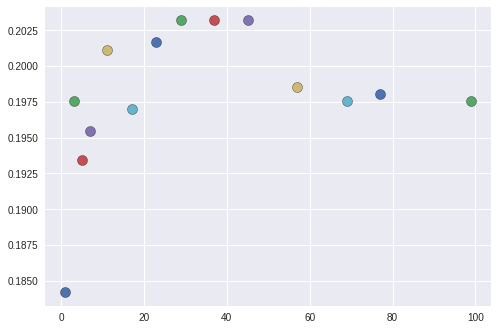

In [141]:
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('seaborn')

for neighbors in [1, 3, 5, 7, 11, 17, 23, 29, 37, 45, 57, 69, 77, 99]:

  #Initialize model
  knn = KNeighborsClassifier(n_neighbors=neighbors)

  #Fit Model
  knn.fit(X_training, Y_training)

  #Get predictions
  Y_predicted = knn.predict(X_testing)

  #Results and print
  evaluate = Y_testing==Y_predicted
  error = (evaluate.shape[0]-np.count_nonzero(evaluate))/evaluate.shape[0]
  print('Error: with ', neighbors,'neighbors', error)
  plt.scatter(neighbors, error,s=100,edgecolors='black')


plt.show()

The best k is 1.

**4.i)** Calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

In [142]:
from sklearn.metrics._plot.roc_curve import auc
from sklearn.metrics import roc_auc_score

#Calculate Probabilities
Y_predicted_lda = lda.predict_proba(X_testing)[:,1]
Y_predicted_qda = qda.predict_proba(X_testing)[:,1]
Y_predicted_logr = logr.predict_proba(X_testing)[:,1]
Y_predicted_gnb = gnb.predict_proba(X_testing)[:,1]

#Calculate AUC
auc_lda = roc_auc_score(Y_testing, Y_predicted_lda)
auc_qda = roc_auc_score(Y_testing, Y_predicted_qda)
auc_logr = roc_auc_score(Y_testing, Y_predicted_logr)
auc_gnb = roc_auc_score(Y_testing, Y_predicted_gnb)

#Same as above but for KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_training, Y_training)
Y_predicted_knn = knn.predict_proba(X_testing)[:,1]
auc_knn = roc_auc_score(Y_testing, Y_predicted_knn)

#Print results
print('AUC for LDA is', auc_lda)
print('AUC for QDA is', auc_qda)
print('AUC for Logistic Regression is', auc_logr)
print('AUC for GNB is', auc_gnb)
print('AUC for KNN is', auc_knn)

AUC for LDA is 0.8063193871225456
AUC for QDA is 0.818987664879881
AUC for Logistic Regression is 0.8022237029228367
AUC for GNB is 0.7453697718284553
AUC for KNN is 0.7290864850708912


**4.j)** Plot the ROC curves for the 5 methods. Compare the results.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how the leave-one-out cross validation (LOOCV) is implemented.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV)

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

The group's opinion about virtual environments is unanimous. These environments present various advantages, being the main one the system organization that they provide. By creating a new environment for every Python project it is possible to:

* Not have the main directory full of unnecessary packages - Great for organization and prevents overwriting;
*   Use a different Python version in each project - Useful when dealing with old programs with older versions of libraries;  
* Keep track of packages needed for a project - When sharing the project with someone, it makes it easier to know which packages are needed in that specific project instead of presenting all the packages installed on the computer.

The downsides found are not significant to the point that becomes a burden or prevents the group from using these virtual environments. 

*   Time consumed to install every library needed for each project - Instead of already having them installed from previous projects, the same library has to be installed in every new environment where it is needed (For the projects in hand, this task is not very time consuming);
*   Space consumed - Some libraries may need to be installed more than once if they are needed in more than one project (However, for the projects in hand, the packages needed are not very big).

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

The biggest difference between these two platforms is the fact that Google Collab is cloud-based, whereas Jupyter Notebook runs on our local hardware.
It is better to use Google Collab when:

*   A lot of collaboration is needed - Since it runs in the cloud, there is no need to install anything. Therefore, anyone may open the notebooks without downloading any software;
*   There is a necessity to have the files backed up in a cloud system - Since it runs in the cloud, the files are automatically saved;
*   Run code in a smartphone or a tablet - No installation of anything is needed prior to running the notebooks, therefore enabling the possibility to run code on other devices besides a computer; 
*   If more computational power is needed besides the one provided by our hardware - Google Collab provides some GPU, memory and run time. If they are not enough, it is possible to pay for their premium plan in order to achieve greater computational power.

It is better to use Jupyter Notebook when:

*   Dealing with sensitive information - When dealing with sensitive information, storing the information in a cloud may be less secure.
*   GPU and runtimes are throttled in free Google Collab accounts - While using Jupyter Notebook the computational power is somewhat stable. However, Google Collab does not guarantee that computational power is always the same, it may fluctuate.

The biggest difference between these two platforms is the fact that Google Collab is cloud-based, whereas Jupyter Notebook runs on our local hardware.
It is better to use Google Collab when:

*   A lot of collaboration is needed - Since it runs in the cloud, there is no need to install anything. Therefore, anyone may open the notebooks without downloading any software;
*   There is a necessity to have the files backed up in a cloud system - Since it runs in the cloud, the files are automatically saved;
*   Run code in a smartphone or a tablet - No installation of anything is needed prior to running the notebooks, therefore enabling the possibility to run code on other devices besides a computer; 
*   If more computational power is needed besides the one provided by our hardware - Google Collab provides some GPU, memory and run time. If they are not enough, it is possible to pay for their premium plan in order to achieve greater computational power.

It is better to use Jupyter Notebook when:

*   Dealing with sensitive information - When dealing with sensitive information, storing the information in a cloud may be less secure.
*   GPU and runtimes are throttled in free Google Collab accounts - While using Jupyter Notebook the computational power is somewhat stable. However, Google Collab does not guarantee that computational power is always the same, it may fluctuate.

**8)** Enter your GitHub repository webpage.